# INCOME CLASSIFICATION logistic regression model

In this project, the aim is to build a predictive model for income classification. The goal of this model is to predict whether an individual's income is above or below a certain threshold, based on various demographic and financial features. The model will be trained on a historical dataset and evaluated based on its accuracy and ability to generalize to unseen data. The outcome of this project has the potential to support decision making for a range of applications, such as financial planning, insurance pricing, and credit scoring."

The dataset is the census information from 1994 census database. The data set is available at the [UCI machine learning respository](https://archive.ics.uci.edu/ml/datasets/census+income).

In [20]:
#library, class and function are imported 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_curve, roc_auc_score
import seaborn as sns

In [21]:
#rename the column, upload the data into pandas dataframe

col_names = [
    'age', 'workclass', 'fnlwgt','education', 'education-num', 
    'marital-status', 'occupation', 'relationship', 'race', 'sex', 
    'capital-gain','capital-loss', 'hours-per-week','native-country', 
    'income'
]

In [22]:
census = pd.read_csv("adult.data", header = None, names = col_names)

In [23]:
#use a for loop to iterate through each columns by stripping extra whitespace for columns of type "object"

for d in census.select_dtypes(include = ["object"]).columns:
    census[d] = census[d].str.strip()
census.shape

(32561, 15)

In [24]:
census.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
#check for imbalance of class (income)
census.income.value_counts(normalize = True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [26]:
#create feature columns
features = [
    'age', "workclass", 'education', 'race', 'sex', 
    'capital-gain','capital-loss', 'hours-per-week'
]

In [27]:
#convert feature to dummies 
x = pd.get_dummies(census[features], drop_first = True)
x[:3]

,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,2174,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,50,0,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,38,0,0,40,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1


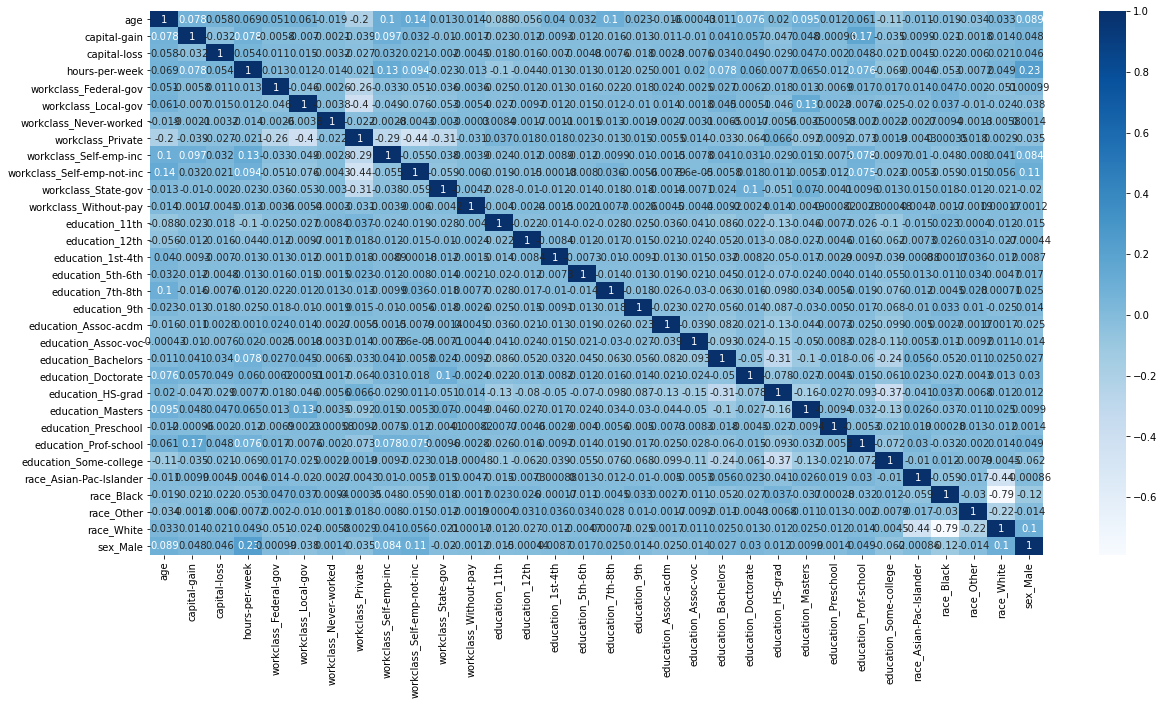

<Figure size 432x288 with 0 Axes>

In [28]:
#create an heat map to check for Multicolinearity of features
plt.figure(figsize = (20, 10))
sns.heatmap(x.corr(), annot = True, cmap = "Blues")
plt.show()
plt.clf()

Base on the observation from the heatmap, there is no multiple co-linearity features. The results show there is a not a correlation btw the features (multiple independent variables)

In [29]:
#select class, where <=50k == 0 and >50k == 1
y = np.where(census.income == "<=50K", 0,1)

### _Training, fiting of model_

In [30]:
#train, test and split data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.2, stratify = y)


#instantiate the LogisticRegression
#fit model to train data

lr = LogisticRegression(penalty = "l1", solver = "liblinear", C = 0.05, max_iter = 1000)
lr.fit(x_train, y_train)


#preview trained model coefficient and intercept
print("LR Intercept: ")
lr.intercept_

LR Intercept: 


array([-5.51705033])

In [31]:
print("LR model coefficient: ")
lr.coef_

LR model coefficient: 


array([[ 3.56759410e-02,  3.12133472e-04,  6.65972490e-04,
         3.04393324e-02,  4.07685788e-01,  0.00000000e+00,
         0.00000000e+00,  3.76691588e-02,  4.47569863e-01,
        -2.57472792e-01,  0.00000000e+00,  0.00000000e+00,
        -4.70881684e-01,  0.00000000e+00,  0.00000000e+00,
        -4.15257428e-01, -7.96280261e-01, -5.15709082e-01,
         5.52906062e-01,  4.99288446e-01,  1.24084633e+00,
         1.89287869e+00,  0.00000000e+00,  1.60426023e+00,
         0.00000000e+00,  1.77793075e+00,  3.71309100e-01,
         0.00000000e+00, -3.03344641e-01,  0.00000000e+00,
         8.62175253e-02,  1.03828258e+00]])

### _Evaluate model Performance_

In [32]:
#predict the class each member below to using the test dataset
predicted_class = lr.predict(x_test)

#check prediction probability
class_proba = lr.predict_proba(x_test)
class_proba

array([[0.90658266, 0.09341734],
       [0.47410147, 0.52589853],
       [0.84902319, 0.15097681],
       ...,
       [0.96682589, 0.03317411],
       [0.91025571, 0.08974429],
       [0.63199284, 0.36800716]])

The first column shows that a member has an income less than 50k, second column shows otherwise. To view the actual prediction. print the predicted class

In [33]:
#evaluate the model performce, use confusion_matrix and accuracy_score
#check for performace accuracy 
#the accurancy of the model is tested with the actual-test-class-data and predicted class

print("The accuracy of the model performance is: ")
accuracy_score(y_test, predicted_class)

The accuracy of the model performance is: 


0.8288039306003377

In [34]:
#more information of the accuracy of the model performance using confusion matrix
cm = confusion_matrix(y_test, predicted_class)
cm

array([[4716,  229],
       [ 886,  682]], dtype=int64)

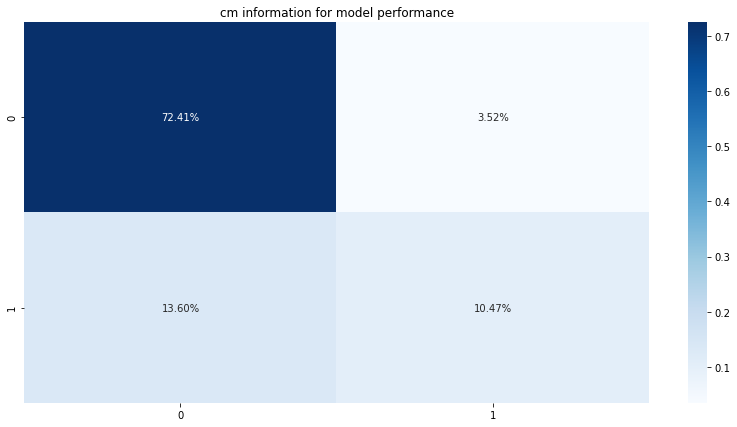

<Figure size 432x288 with 0 Axes>

In [35]:
#visualization of the confusion matrix

plt.figure(figsize = (14, 7))
sns.heatmap(cm/np.sum(cm), annot = True, fmt = ".2%", cmap = "Blues")
plt.title("cm information for model performance")
plt.show()
plt.clf()

approximate value of the confusion matrix

72% are true Negative while 14% are fasle Negative. 

10% is true Positive while 3% is False Positive.

In [36]:
#created new dataframe for the most important features
cf_df = pd.DataFrame(zip(x_train.columns, lr.coef_[0]), columns = ["features", "coefficient"]).sort_values("coefficient")

#removed features that are equal to zero
cf_df = cf_df[cf_df.coefficient > 0].sort_values("coefficient")
cf_df

,features,coefficient
1,capital-gain,0.000312
2,capital-loss,0.000666
3,hours-per-week,0.030439
0,age,0.035676
7,workclass_Private,0.037669
30,race_White,0.086218
26,education_Some-college,0.371309
4,workclass_Federal-gov,0.407686
8,workclass_Self-emp-inc,0.447570
19,education_Assoc-voc,0.499288


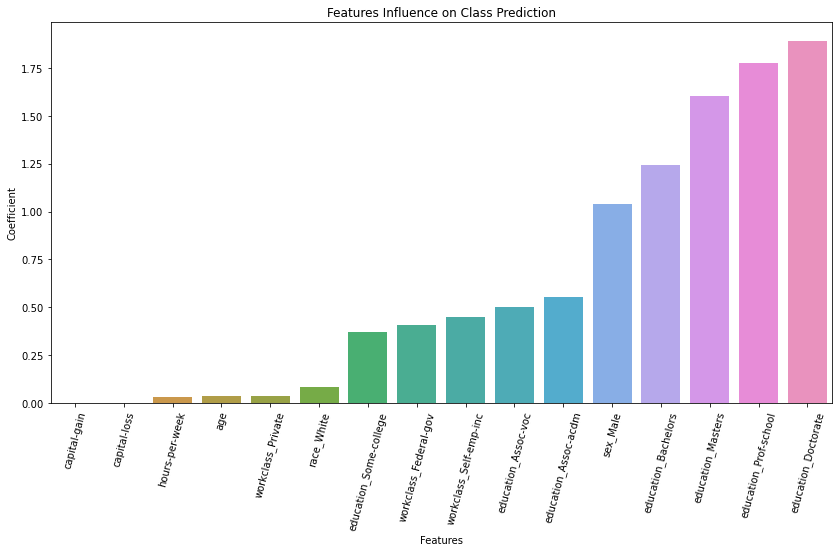

<Figure size 432x288 with 0 Axes>

In [37]:
#create a barplot to visualize the features that has most influence on the income class
plt.figure(figsize = (14, 7))
sns.barplot(x = "features", y = "coefficient", data = cf_df)
plt.title("Features Influence on Class Prediction")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.xticks(rotation = 75)
plt.show()
plt.clf()

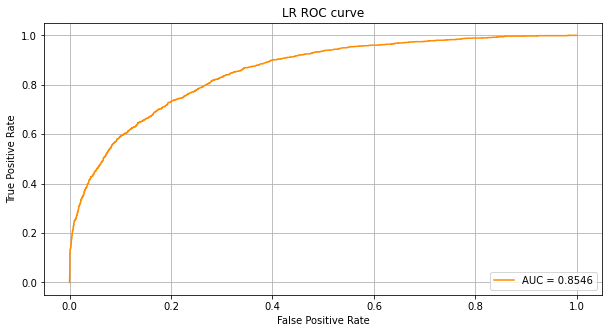

<Figure size 432x288 with 0 Axes>

In [50]:
#Create an Reciever Operating Characteristic (ROC) Curve and Area Under The Curve (AUC) plot
#fpr = false positive rate, #tpr = true positive rate, threshold

fpr, tpr, threshold = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
auc = roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])
 
#graphical representation of the ROC and AUC curve
plt.figure(figsize = (10, 5))
plt.plot(fpr, tpr, label = "AUC = %.4f" %auc, color = "DarkOrange")
plt.title("LR ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0.1], [0.1], linestyle = "dashed")
plt.grid()
plt.legend(loc = 4)
plt.show()
plt.savefig("income_class_roc_cuve.png")